In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection, svm

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Input
import seaborn as sns; sns.set_theme()
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-data/PS_20174392719_1491204439457_log.csv


# importando nosso dataframe

In [2]:
#carrega a base de treino
df=pd.read_csv(r"../input/fraud-data/PS_20174392719_1491204439457_log.csv",encoding='latin-1')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Removendo colunas desnecessarias

In [4]:
x = df.drop(['isFraud'],axis='columns')

# Como os dados se comportam ?

In [5]:
df.sample(n=10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2199174,185,CASH_IN,22066.45,C651427991,155.00,22221.45,C471258515,1464187.89,1078797.88,0,0
1696988,159,CASH_IN,357377.78,C2091812018,20400.00,377777.78,C683354465,1610670.86,1253293.08,0,0
4821520,346,CASH_IN,131727.61,C684617606,4470756.29,4602483.90,C2107760546,597494.00,465766.39,0,0
89395,10,CASH_OUT,46468.13,C342845386,0.00,0.00,C751147807,2364272.46,2410740.59,0,0
1187144,132,CASH_OUT,24581.85,C1307230417,0.00,0.00,C731947061,1382750.52,1407332.36,0,0
5728258,399,PAYMENT,73709.07,C668009719,130269.67,56560.60,M1001695424,0.00,0.00,0,0
546962,21,CASH_OUT,368570.88,C548482077,0.00,0.00,C1432083914,2451811.78,4252641.27,0,0
6095036,522,CASH_OUT,38107.61,C484650586,302282.00,264174.39,C1918303384,0.00,38107.61,0,0
1625433,157,PAYMENT,19041.33,C1679726304,0.00,0.00,M750436827,0.00,0.00,0,0
2007974,179,TRANSFER,661871.81,C33015417,0.00,0.00,C324589222,1842451.86,2504323.67,0,0


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


### Label encoder

In [7]:

labelencoder = LabelEncoder()
x = x.drop(['nameOrig','nameDest'], axis='columns')
#x['nameOrig'] = labelencoder.fit_transform(x['nameOrig'])
#x['nameDest'] = labelencoder.fit_transform(x['nameDest'])

### one hot encoder :

In [8]:
x = pd.get_dummies(x)

### Como ficaram os dados?

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFlaggedFraud  int64  
 7   type_CASH_IN    uint8  
 8   type_CASH_OUT   uint8  
 9   type_DEBIT      uint8  
 10  type_PAYMENT    uint8  
 11  type_TRANSFER   uint8  
dtypes: float64(5), int64(2), uint8(5)
memory usage: 370.1 MB


In [10]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


# SEPARAÇÃO TREINO E TESTE

In [11]:
#Separação entre treino e teste
from sklearn.preprocessing import RobustScaler
y=df['isFraud'].to_numpy().reshape(-1,1)
#del df 
scaler = RobustScaler()
x = scaler.fit_transform(x)
np.random.seed(50)
xx = x.reshape(-1,1, x.shape[-1])
x_treino=xx
y_treino=y
#x_treino, x_teste, y_treino, y_teste = train_test_split (x, y, test_size = 0.20, random_state = 42)

In [12]:
print(f"train: {x_treino.shape} \ntargets: {y_treino.shape}")

train: (6362620, 1, 12) 
targets: (6362620, 1)


# PIPELINE DO NOSSO MODELO

In [13]:
def build_model():
    model = Sequential()

    model.add(Input(shape=x_treino.shape[-2:]))
    model.add(Dense(16, activation='relu', input_dim=8))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [14]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 16)             208       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 16)             272       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

# VISUALIZAR FICA MAIS FACIL...

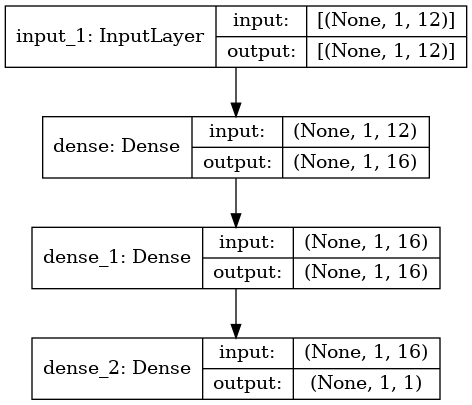

In [15]:
plot_model(
    model, 
    to_file='model.png', 
    show_shapes=True,
    show_layer_names=True
)

# FUNCOES PARA PLOTAR OS GRAFICOS

In [16]:
def display_accuracy_graph(training_acc, validation_acc):
    epochs = range(1, len(training_acc) + 1)

    plt.plot(epochs, training_acc, 'bo', label='Training acc')
    plt.plot(epochs, validation_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def display_loss_graph(training_loss, validation_loss):
    epochs = range(1, len(training_loss) + 1)

    plt.plot(epochs, training_loss, 'bo', label='Training loss')
    plt.plot(epochs, validation_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def show_metrics(history):
    print(history.history)

    plt.figure(1)
    plt.subplot(211)
    display_loss_graph(history.history['loss'], history.history['val_loss'])

    plt.subplot(212)
    display_accuracy_graph(history.history['accuracy'], history.history['val_accuracy'])

    plt.show()

# VAMOS EXECUTAR NOSSO MODELO UTILIZANDO TPU 
## CASO NAO POSSUA UMA TPU BASTA COMENTAR PRIMEIRA LINHA

2021-10-24 05:45:43.358635: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
4661/4661 [==============================] - 19s 4ms/step - loss: 0.0070 - accuracy: 0.9993 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 2/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 3/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 4/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 5/5
4661/4661 [==============================] - 16s 3ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0014 - val_accuracy: 0.9997
{'loss': [0.006962995044887066, 0.001800447003915906, 0.0015910795191302896, 0.0015104934573173523, 0.0014624904142692685], 'accuracy': [0.9993235468864441, 0.999577522277832, 0.9996217489242554, 0.9996479153633118, 0.9996659755706787], 'val_loss': [0.0020127815660089254, 0.00163

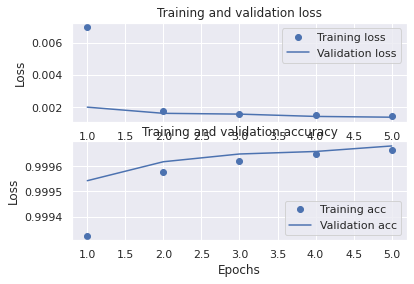

Epoch 1/5
4661/4661 [==============================] - 16s 3ms/step - loss: 0.0164 - accuracy: 0.9961 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 2/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 3/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 4/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 5/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 0.9997
{'loss': [0.016406113281846046, 0.0019646105356514454, 0.0017401630757376552, 0.0016253674402832985, 0.0015681771328672767], 'accuracy': [0.9960948824882507, 0.9995364546775818, 0.9995877742767334, 0.9996192455291748, 0.9996347427368164], 'val_loss': [0.0025064265355467796, 0.001

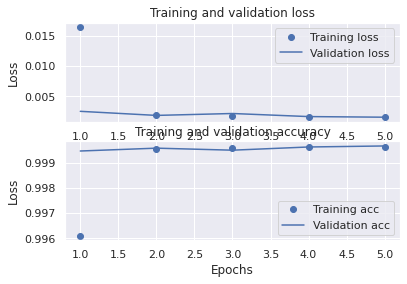

Epoch 1/5
4661/4661 [==============================] - 17s 3ms/step - loss: 0.0096 - accuracy: 0.9991 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 2/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 3/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 0.9997
Epoch 4/5
4661/4661 [==============================] - 16s 3ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 5/5
4661/4661 [==============================] - 16s 3ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9996
{'loss': [0.009565823711454868, 0.0018910086946561933, 0.001635101274587214, 0.0015321453101933002, 0.0014836173504590988], 'accuracy': [0.9990859031677246, 0.9995735287666321, 0.9996217489242554, 0.9996370673179626, 0.9996458292007446], 'val_loss': [0.0023921076208353043, 0.0017

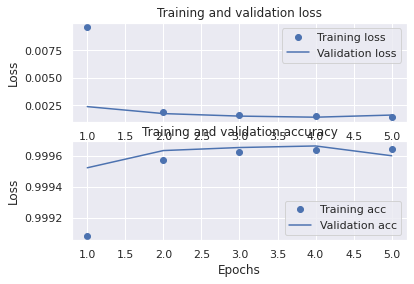

Epoch 1/5
4661/4661 [==============================] - 17s 3ms/step - loss: 0.0076 - accuracy: 0.9993 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 2/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 3/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 0.9997
Epoch 4/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 5/5
4661/4661 [==============================] - 15s 3ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0013 - val_accuracy: 0.9997
{'loss': [0.00758311478421092, 0.0018443643348291516, 0.0016731633804738522, 0.0015614512376487255, 0.0015292795142158866], 'accuracy': [0.9992839694023132, 0.9995982646942139, 0.999624490737915, 0.9996470808982849, 0.9996582269668579], 'val_loss': [0.0018834836082533002, 0.00165

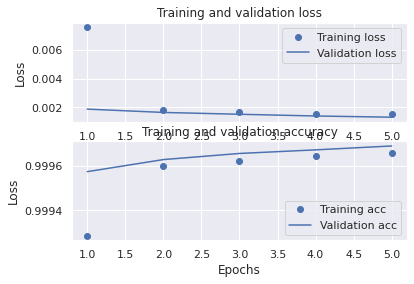

mean: 99.9658152461052%std_deviation 0.0035213871640923404%


In [17]:

kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=128)

k_fold_accuracies = []

for k_train, k_test in kfold.split(x_treino,y_treino):
    history = build_model().fit(
        x_treino[k_train],
        y_treino[k_train],
        epochs=5,
        batch_size=1024,
        validation_data=(x_treino[k_test], y_treino[k_test]))

    val_acc = history.history['val_accuracy'][-1]
    k_fold_accuracies.append(val_acc)
    
    show_metrics(history)
    
(mean_acc, std_deviation)= (np.mean(k_fold_accuracies), np.std(k_fold_accuracies))
    
print("mean: " + str(mean_acc * 100) + 
          "%std_deviation " + str(std_deviation * 100) + "%")
   